In [1]:
# Kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Veriyi ayırmak için scikit learn kütüphanesinden fonksiyon çağrılması
from sklearn.model_selection import train_test_split
# Lineer regresyon modelinin çağrılması
from sklearn.linear_model import LinearRegression
# Model Başarı değerlendirmesi
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')

In [3]:
# Veriyi okuma, orijinal veriyi kopyalama, İlk 5 gözlemi ekrana gösterme işlemleri
data = pd.read_csv('../Simple_Linear_Regression/Salary_Data.csv')
df = data.copy()
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Veri hakkında bilgi edinmek için sütun isimlerinin kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# Veri setinin basit istatistikleri
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 864x432 with 0 Axes>

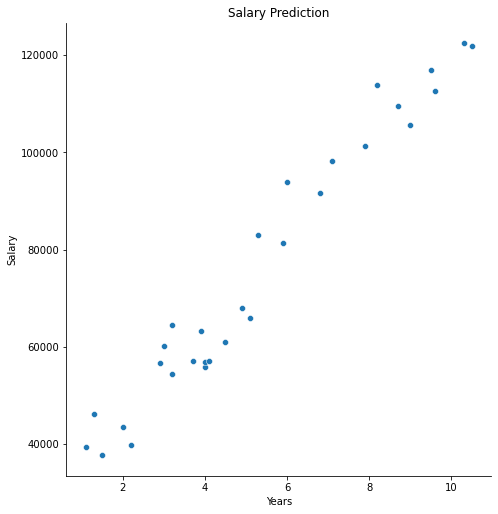

In [6]:
# Değerleri ve bunların nasıl dağıldığının grafikler ile görselleştrilmesi
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'], y_vars=['Salary'],
             size=7, kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')

plt.show()

In [7]:
# Bağımlı ve bağımsız değişkenin ayrılması 
y , X = df['Salary'], df['YearsExperience']
X.head()


0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [8]:
# Veriyi, eğitim ve test olarak ayırma
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=60)

In [9]:
# dataframeleri numpy array haline getirme
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [10]:
# Model eğitme 
lr = LinearRegression()
lr.fit(X_train, y_train);

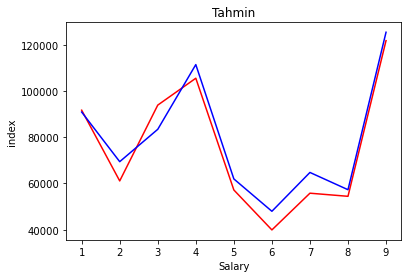

In [11]:
# Model tahmin ve Görselleştirilmesi

y_pred = lr.predict(X_test)


c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Tahmin')
plt.show()

In [12]:
MSE = mean_squared_error(y_test,y_pred)
RSQ = r2_score(y_test,y_pred)

print("mean_squared_error: {} \nR square: {}".format(MSE,RSQ))

mean_squared_error: 44985813.4369255 
R square: 0.9357396452117491


In [14]:
# Linear regression function
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)


Intercept of the model: 27410.180457408234
Coefficient of the line: [9341.68228671]


$$
y = 27410.1 + 9331.68x
$$